# Plot pair of Afanasievo Indivdiuals
For Extended Figure for ancIBD Paper
The pairs of Samples is:

I11752, SHT002

In [1]:
import socket as socket
import os as os
import sys as sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
socket_name = socket.gethostname()
print(socket_name)

if socket_name.startswith("compute-"):
    print("HSM O2 Computational partition detected.")
    path = "/n/groups/reich/hringbauer/git/hapBLOCK/"  # The Path on Harvard Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")

os.chdir(path)  # Set the right Path (in line with Atom default)
print(os.getcwd())

### hapsburgImport
#sys.path.insert(0, "/n/groups/reich/hringbauer/git/hapBLOCK/python3/")
sys.path.insert(0,"/n/groups/reich/hringbauer/git/hapBLOCK/package/")
from ancIBD.plot.plot_karyotype import plot_karyo_from_ibd_df, plot_pde_individual_from_ibd_df

### Set Arial Font
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'   # Set the defaul
rcParams['font.sans-serif'] = ['Arial']  # Make sure to have the font installed (it is on cluster for Harald)

compute-a-16-54.o2.rc.hms.harvard.edu
HSM O2 Computational partition detected.
/n/groups/reich/hringbauer/git/hapBLOCK


### Panel a: Karyotype Plot

Loaded 3282060 IBD segments
Found: 17 Pairs fitting in dataframe.

Saved figure to ./figs/afa/I11752_SHT002.pdf


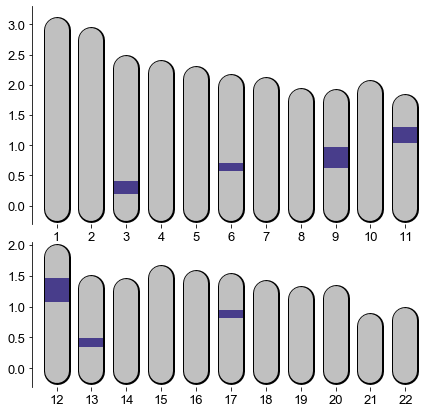

In [4]:
df_ibd = pd.read_csv("/n/groups/reich/hringbauer/git/ibd_euro/output/ibd/ibd220.ibd.v54.1.tsv", sep="\t")
print(f"Loaded {len(df_ibd)} IBD segments")

iids = ["I11752", "SHT002"]
plot_karyo_from_ibd_df(df_ibd, iids=iids,  min_cm=12, title="", #I11752, Russia Afanasievo\nSHT002, Mongolia Afanasievo
                       figsize=(7, 7),
                       savepath=f"./figs/afa/" + "_".join(iids) + ".pdf")

### Panel b: Histogram

Found: 17 Pairs fitting in dataframe.

Saved to ./figs/afa/I11752_SHT002_histo.pdf.


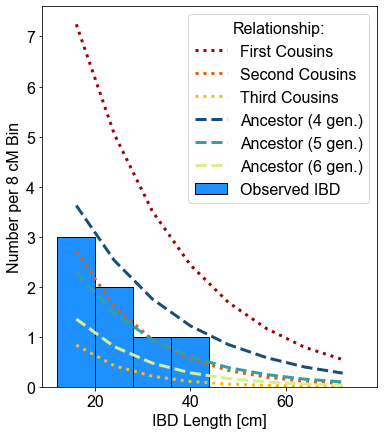

In [6]:
plot_pde_individual_from_ibd_df(df_ibd, iids=["I11752", "SHT002"], min_cm=10, figsize=(6,7),
                                    comm_ancs =[4,4,4, 2,2,2], ms=[4, 6, 8, 4, 5, 6],
                                    labels=["First Cousins", "Second Cousins", "Third Cousins", "Ancestor (4 gen.)", "Ancestor (5 gen.)", "Ancestor (6 gen.)"],
                                    cs = ["#9d0208", "#e85d04", "#ffba08", "#184e77", "#34a0a4", "#d9ed92"], title="",
                                    ls = [":", ":", ":", "--", "--", "--"],
                                    bw_cm=8, plotlim=[12,80], lw_curve=3,
                                    leg_loc = "upper right", output=False, savepath=f"./figs/afa/" + "_".join(iids) + "_histo.pdf")

### Panel c: Geographic Distance

In [2]:
### Requires basemap to run
### Hack for Basemap 
import mpl_toolkits
mpl_toolkits.__path__.append('/n/groups/reich/hringbauer/explore_ntbk/jptvenv37/lib/python3.7/site-packages/basemap-1.2.1-py3.7-linux-x86_64.egg/mpl_toolkits/')
from mpl_toolkits.basemap import Basemap

Saved to ./figs/afa/I11752_SHT002_map.png


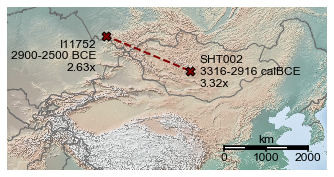

In [6]:
savepath=f"./figs/afa/" + "_".join(iids) + "_map.png"
pt1 = [100.7613889, 46.30561667] ### Lon/Lat Coord SHT002
pt2 = [83.06356944, 51.31202778] ### Lon/Lat Coord I11752
s = 80
lw = 2
fs_labels = 12

crs=[30, 55, 62, 130]
figsize=(6,3)
res="f"
col_cont="#d9d9d9"
col_lake="#d9d9d9"    
c = "maroon"
ct = "k"
marker="X"

ew=1

fig = plt.figure(figsize=figsize)

ax = plt.gca()

m = Basemap(projection='merc', llcrnrlat=crs[0], urcrnrlat=crs[1],\
            llcrnrlon=crs[2], urcrnrlon=crs[3], resolution=res, ax=ax)  # mill

m.fillcontinents(color=col_cont, zorder=0, lake_color=col_lake)
m.shadedrelief()
#m.etopo(scale=0.5, alpha=0.4)  # Topological Map
m.drawcoastlines(color='gray', zorder=0)
m.drawcountries(color="dimgray", linewidth=1)

pt1 = m(pt1[0], pt1[1])
pt2 = m(pt2[0], pt2[1])

ax.plot([pt1[0],pt1[1]], [pt2[0],pt2[1]], marker=marker, c=c, linewidth=lw, linestyle="--")
ax.scatter([pt1[0],pt1[1]], [pt2[0],pt2[1]], marker=marker, c=c, ec="k", s=s, lw=ew, zorder=3)

### Annotate the two Samples:
ax.annotate('SHT002\n3316-2916 calBCE\n3.32x', xy=(pt1[0], pt1[1]), ha='left', va='center', color=ct, 
            xytext=(10,0), textcoords='offset points', fontsize=fs_labels)
ax.annotate('I11752\n2900-2500 BCE\n2.63x', xy=(pt2[0], pt2[1]), ha='right', va='center', color=ct, 
            xytext=(-10,-20), textcoords='offset points', fontsize=fs_labels)

### Do the km scale
m.drawmapscale(117, 34, 100.8, 40, length=2000, barstyle='fancy', fontsize=fs_labels)

ax.axis('off')

if len(savepath)>0:
    plt.savefig(savepath, bbox_inches ='tight', pad_inches = 0, dpi=200)
    print(f"Saved to {savepath}")  
    
plt.show()

### Panel d: Plot Posterior on one chromosome

In [4]:
from ancIBD.run import hapBLOCK_chrom, run_plot_pair

### To conform with Nature Style

In [5]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

Filtering to 0.99 GP variants: 0.894x
Filtering to 0.99 GP variants: 0.920x
Filtering to common GP variants: 0.843x
Plotting 53737 markers
Saved to ./figs/afa/I11752_SHT002_post.chr12.png


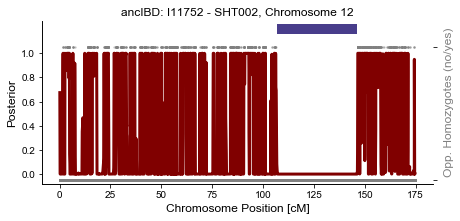

In [15]:
iids = ["I11752", "SHT002"]
savepath=f"./figs/afa/" + "_".join(iids) + "_post.chr12.png"

run_plot_pair(iids=iids, ch=12, plot=True, xlim=[],
              path_h5 = "/n/groups/reich/hringbauer/git/hapBLOCK/data/hdf5/1240k_v54.1/ch",
              min_cm=6, p_col='variants/AF_ALL', ms=1.5, c_ibd="darkslateblue",
              title='ancIBD: I11752 - SHT002, Chromosome 12',
              path_fig=savepath, fs_l=12, figsize=(7,3)); # f"./figs/ibd_pair/{iids[0]}_{iids[1]}.png" #16	